In [ ]:
# Define environment variables 
%env DEEP_ROOT=/content/drive/My Drive/brAIn-Power
%env DEEP_DATA=/content/drive/My Drive/correct_data

# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory before importing files
import os
deep_root = os.getenv("DEEP_ROOT")
%cd $deep_root

!pip install import-ipynb
import import_ipynb

env: DEEP_ROOT=/content/drive/My Drive/brAIn-Power
env: DEEP_DATA=/content/drive/My Drive/correct_data
Mounted at /content/drive
/content/drive/My Drive/brAIn-Power
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=611c29671b42fb85e0a4b7d0fbbca9092a549d608668f0e0fb989c4d1c9dfd8c
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [ ]:
from LoadData import CustomDataset, load_data_2np,one_hot_encode,one_hot2_2d
import UNet
import torch
import time
import numpy as np
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
from IPython.display import clear_output

import sklearn.metrics

importing Jupyter notebook from LoadData.ipynb
importing Jupyter notebook from UNet.ipynb


In [ ]:
# Define some helper functions for later:
# def IoU_score(target, prediction):
#   ioulst = []
#   for j in range(target.shape[0]):
#     iou_score = 0
    
#     no_classes = target.shape[1]
#     tar1 = np.argmax(target[j]).astype('int8')
#     pred1 = one_hot2_2d(prediction[j]).astype('int8')
#     for i in range(no_classes):
#       cur_target = tar1.flatten()
#       cur_pred = pred1.flatten()
#       target_idx = np.where(cur_target == i)
#       prediction_idx = np.where(cur_pred == i)
      
#       target_idx = list(target_idx)
#       prediction_idx = list(prediction_idx)
#       intersection = len(list(set(target_idx[0]) & set(prediction_idx[0])))
#       union = np.concatenate((target_idx[0], prediction_idx[0]),axis=0)
#       union = union.tolist()
#       union = len(list(set(union)))
#       if union != 0:
#         iou_score += intersection / union
#     iou_score = iou_score/no_classes
#     ioulst.append(iou_score)
#   return np.mean(ioulst)

In [ ]:
# Define some helper functions for later:
def IoU_score(target, prediction,threshold=0.9):
  ioulst = []
  correct = []
  for j in range(target.shape[0]):
    tar1 = one_hot2_2d(target[j])[0].flatten()
    pred1 = np.argmax(prediction[j],axis=0).flatten()
    iou = sklearn.metrics.jaccard_score(tar1,pred1,average='weighted')
    if iou>=threshold:
      correct.append(1)
    else:
      correct.append(0)

    ioulst.append(iou)
  return np.mean(ioulst),sum(correct)

In [ ]:
tar1 = np.random.randint(0,9,(256,256)).flatten()
pred1 = np.random.randint(0,9,(256,256)).flatten()
iou = sklearn.metrics.jaccard_score(tar1,pred1,average='weighted')
print(iou)

0.05871468939243816


In [ ]:
# Load data the first time
#X_train, Y_train, X_valid, Y_valid, X_trans, Y_trans, X_test, Y_test = load_data_2np(hot_encoding=True, valid_perc=0.1, train_perc=0.1,show=0,CAD_perc=0,background=True)

In [ ]:
Valid_perc = 0.15

X_train = np.load(f"data/compressed_data/with_background/X_train,.npy")
Y_train = np.load(f"data/compressed_data/with_background/Y_train,.npy")
X_CAD = np.load(f"data/compressed_data/with_background/X_cad_rnd.npy")
Y_CAD = np.load(f"data/compressed_data/with_background/Y_cad_rnd.npy")
X_test = np.load(f"data/compressed_data/with_background/X_test,.npy")
Y_test = np.load(f"data/compressed_data/with_background/Y_test,.npy")


# Y_train = np.concatenate((Y_train,Y_trans[0:100]),axis=0)
# X_train = np.concatenate((X_train,X_trans[0:100]),axis=0)
Y_train = one_hot_encode(imgs=Y_train)
Y_test = one_hot_encode(imgs=Y_test)
# Y_CAD = one_hot_encode(imgs=Y_CAD)

idx = int(Valid_perc*X_train.shape[0])
X_valid = X_train[0:idx]
X_train = X_train[idx::]
X_train = np.concatenate((X_train,X_CAD),axis=0)

Y_valid = Y_train[0:idx]
Y_train = Y_train[idx::]
Y_train = np.concatenate((Y_train,Y_CAD),axis=0)

In [ ]:
# Save data for easier load next time - remember to name accodingly
# The naming scheme refers pparameters of the load_data_2np function
#np.save("data/X_train_hot_v0.1_t0.1_s0_c0_True", X_train)
#np.save("data/Y_train_hot_v0.1_t0.1_s0_c0_True", Y_train)
#np.save("data/X_valid_hot_v0.1_t0.1_s0_c0_True", X_valid)
#np.save("data/Y_valid_hot_v0.1_t0.1_s0_c0_True", Y_valid)
#np.save("data/X_trans_hot_v0.1_t0.1_s0_c0_True", X_trans)
#np.save("data/Y_trans_hot_v0.1_t0.1_s0_c0_True", Y_trans)
#np.save("data/X_test_hot_v0.1_t0.1_s0_c0_True", X_test)
#np.save("data/Y_test_hot_v0.1_t0.1_s0_c0_True", Y_test)

In [ ]:
# # Load dataset from .npy files
# data_set = "hot_v0.1_t0.1_s0_c0_True"

# X_train = np.load(f"data/X_train_{data_set}.npy")
# Y_train = np.load(f"data/Y_train_{data_set}.npy")
# X_valid = np.load(f"data/X_valid_{data_set}.npy")
# Y_valid = np.load(f"data/Y_valid_{data_set}.npy")
# X_test = np.load(f"data/X_test_{data_set}.npy")
# Y_test = np.load(f"data/Y_test_{data_set}.npy")



In [ ]:
# Load transformations if needed
#X_trans = np.load(f"data/X_trans_{data_set}.npy")
#Y_trans = np.load(f"data/Y_trans_{data_set}.npy")

In [ ]:
DS_train = CustomDataset(X_train, Y_train,one_hot=True)
DS_valid = CustomDataset(X_valid, Y_valid, one_hot=True)
DS_test = CustomDataset(X_test, Y_test, one_hot=True)

In [ ]:
# Clear space
del X_train
del Y_train
del X_valid
del X_test
del Y_test

In [ ]:
# # Perform preprocessing
DS_train.gray_gamma_enhanced()
DS_valid.gray_gamma_enhanced()
DS_test.gray_gamma_enhanced()

In [ ]:
# Check if GPU is available and functions to convert Tensors to Cuda
use_cuda = torch.cuda.is_available()
print("Running GPU.") if use_cuda else print("No GPU available.")

Running GPU.


In [ ]:
def Dicecoeff(prediction,label):
  dice = 0
  for i in range(prediction.shape[0]):
    pred1 = one_hot_encode(np.argmax(prediction[i],axis=0))
    intersection = np.sum((pred1 * label[i]))
    print('check ',np.amax(np.argmax(prediction[i],axis=0)))
    dice += (2*intersection+1)/(pred1.sum()+label[i].sum()+1)
  
  return dice/prediction.shape[0]


In [ ]:
# #Try out dice
# trained_model = torch.load('poster_network.pickle')
# trained_model= trained_model.to(torch.float)
# trained_model.cuda()

# DL_try = DataLoader(DS_valid)

# dice = []
# # trained_model.cuda()
# for i,data in enumerate(DL_try):
#   input = data[0].type(torch.FloatTensor)
#   target = data[1].type(torch.FloatTensor)
  
#   # Tranfer to GPU if possible
#   input = get_variable(input)
#   target = get_variable(target)
  
#   output = trained_model(input)
#   dice.append(Dicecoeff(get_numpy(output),get_numpy(target)))

# print(np.mean(dice))


check  8
check  8
check  8
check  8
check  8
check  7
check  8
check  8
check  7
check  7
check  8
check  8
check  8
check  8
check  8
check  8
check  8
check  8
check  8
check  8
0.9031165838883677


In [ ]:
# Load in model
%%capture
net = UNet.UNet50(n_classes=9, rgb=False)
net = net.to(torch.float)
if use_cuda:
    print('converting network to cuda-enabled')
    net.cuda()


In [ ]:
# Converts tensors to cuda, if available
def get_variable(x):
    if use_cuda:
        return x.cuda()
    return x

In [ ]:
# Get numpy array for both cuda and not
def get_numpy(x):
    if use_cuda:
        return x.cpu().data.numpy()
    return x.data.numpy()

In [ ]:
# Create lossfunction and optimizer
criterion = UNet.DiceLoss()
optimizer = torch.optim.Adam(net.parameters(),lr=5e-5,weight_decay=1e-7)

NameError: ignored

In [ ]:
# Define hyper parameters
NUM_EPOCHS = 301
check_at = 10

In [ ]:
# # grey_img = one_hot2_2d(DS_valid.labels[8])[0]/8
# grey_img = np.moveaxis(DS_valid.data[8],[2,0],[0,2])
# grey_img = DS_valid.data[8].transpose([0,1,2])
# img = np.zeros((256,256,3))
# img[:,:,0] = DS_valid.data[8][0,:,:]
# img[:,:,1] = DS_valid.data[8][1,:,:]
# img[:,:,2] = DS_valid.data[8][2,:,:]

# plt.imshow(img)#,'grey_example.png')

# plt.imsave('rgb_example.png',img)

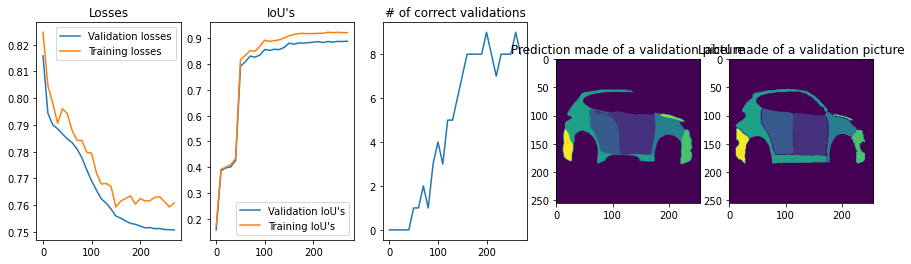

At epoch 270 Training loss is at 0.7607851624488831 and the IoU is at 0.9219049792346701%
At epoch 270 Validation loss is at 0.7507683604955673 and the IoU is at 0.8886700322118338%
train epoch 271
train epoch 272


KeyboardInterrupt: ignored

In [ ]:
# Define list to stor intermediat results
valid_iter = []
valid_loss = []
valid_iou = []
valid_correct = []

train_iter = []
train_loss = []
train_iou = []

# Define data loaders to serve data
# DS_train.remove_transforms()
# DS_train.transforms(p_rot=0.1,p_trans=0.1,p_zoom=0.1,p_shear=0.1)
# DL_train = DataLoader(DS_train, batch_size=16, shuffle=True)
# DS_valid.get_edges()
DL_valid = DataLoader(DS_valid)

# Training loop
net.train()
for epoch in range(NUM_EPOCHS):

    print(f"train epoch {epoch}")
    # transform data and add it to the dataloader
    DS_train.transforms(p_rot=0.1,p_trans=0.1,p_zoom=0.1,p_shear=0.1)
    DL_train = DataLoader(DS_train, batch_size=16, shuffle=True)
    for i, data in enumerate(DL_train, 0):
        net.train()
        input = data[0].type(torch.FloatTensor)
        target = data[1].type(torch.FloatTensor)

        # Tranfer to GPU if possible
        input = get_variable(input)
        target = get_variable(target)

        # Train the network
        optimizer.zero_grad()
        output = net(input)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()

        # Save space
        del input
        del target
        del output
        del loss
    # remove transformations so new ones can take their place.    
    

    # If we want to evaluate
    if epoch % check_at == 0:
      net.eval()

      with torch.no_grad():
        # Evaluate training
        train_losses, train_ious, train_batches = 0, 0, 0
        for i, data in enumerate(DL_train, 0):
          input = data[0].type(torch.FloatTensor)
          target = data[1].type(torch.FloatTensor)

          # Tranfer to GPU if possible
          input = get_variable(input)
          target = get_variable(target)
          
          output = net(input)

          # Record performance
          train_batches += 1
          train_losses += criterion(output, target).item()
          train_ious += IoU_score(get_numpy(target), get_numpy(output))[0]

          # Save space
          del input
          del target
          del output

        train_iter.append(epoch)
        train_loss.append(train_losses / train_batches)
        train_iou.append(train_ious / train_batches)

        # Evaluate validation
        val_losses, val_ious, val_batches,n_correct = 0, 0, 0, 0
        once=True
        for i, valid_data in enumerate(DL_valid, 0):
            input = valid_data[0].type(torch.FloatTensor)
            target = valid_data[1].type(torch.FloatTensor)
            
            # Tranfer to GPU if possible
            input = get_variable(input)
            target = get_variable(target)
            
            output = net(input)
            if i>=np.random.randint(0,len(DS_valid)) and once:
            #   input1 = input
            #   output1 = output
              img = one_hot2_2d(get_numpy(output[0]))[0]
              img_label = one_hot2_2d(get_numpy(target[0]))[0]
              once = False
            # Record performance
            val_batches += 1
            val_losses += criterion(output, target).item()
            val_ious += IoU_score(get_numpy(target), get_numpy(output))[0]
            n_correct += IoU_score(get_numpy(target), get_numpy(output))[1]
            # Save space
            del input
            del target
            del output

        valid_iter.append(epoch)
        valid_loss.append(val_losses / val_batches)
        valid_iou.append(val_ious / val_batches)
        valid_correct.append(n_correct)
        clear_output(wait=True)
        fig = plt.figure(figsize=(15,4))
        plt.subplot(151)
        plt.plot(valid_iter,valid_loss,label='Validation losses')
        plt.plot(train_iter,train_loss,label='Training losses')
        plt.title('Losses')
        plt.legend()

        plt.subplot(152)
        plt.plot(valid_iter,valid_iou,label='Validation IoU\'s')
        plt.plot(train_iter,train_iou,label='Training IoU\'s')
        plt.title('IoU\'s')
        plt.legend()
        
        plt.subplot(153)
        plt.plot(valid_iter,valid_correct)
        plt.title('# of correct validations')

        plt.subplot(154)
        plt.imshow(img)
        plt.title('Prediction made of a validation picture')

        plt.subplot(155)
        plt.imshow(img_label)
        plt.title('Label made of a validation picture')
        plt.show()
        print(f'At epoch {epoch} Training loss is at {train_loss[-1]} and the IoU is at {train_iou[-1]}%')
        print(f'At epoch {epoch} Validation loss is at {valid_loss[-1]} and the IoU is at {valid_iou[-1]}%') 
    DS_train.remove_transforms()

In [ ]:
torch.save(net,'poster_network.pickle')


In [ ]:
# Mask should not be one hot encoded (2d)
def plotMaskOnImage(img, mask, remove: int):

    # Mask out 0's
    mask = np.ma.masked_where(mask == 0, mask)

    fig, ax = plt.subplots()
    if len(img.shape)>2:
      ax.imshow(np.moveaxis(img, [0], [-1]))
    else:
      pass
      ax.imshow(img,'gray')
    ax.imshow(np.squeeze(mask),'gist_ncar')
    plt.show()

(9, 256, 256) (256, 256) (1, 256, 256)


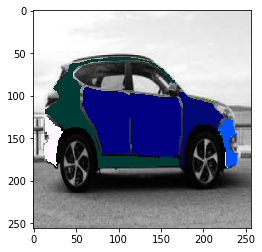

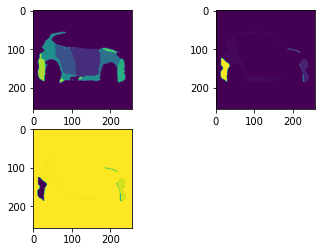

8 40353607.0


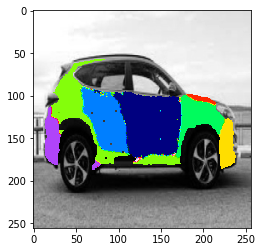

0


In [ ]:
val_img = 3
print(DS_valid.labels[val_img].shape,one_hot2_2d(DS_valid.labels[val_img])[0].shape,DS_valid.data[val_img].shape)
# Target 
plotMaskOnImage(DS_valid.data[val_img,0],one_hot2_2d(DS_valid.labels[val_img])[0],0)

# Network output
output = np.squeeze(
            get_numpy(
                net(
                    get_variable(
                        torch.from_numpy(
                            DS_valid.data[val_img][np.newaxis, :, ::]
                            ).type(torch.cuda.FloatTensor)
                        )
                    )
                )
            )

output_2d = np.zeros((256, 256))

mistake_arr = np.zeros((256,256))
# for i in range(256):  # row
#   for j in range(256):  # col
#     if output_2d[i,j] != one_hot2_2d(DS_valid.labels[val_img])[0,i,j]:
#       print(output_2d[i,j],one_hot2_2d(DS_valid.labels[val_img])[0,i,j],i,j)
#       mistake_arr[i,j] = 1
output_2d = np.argmax(output,axis=0)
plt.subplot(221)
plt.imshow(output_2d)

plt.subplot(222)
plt.imshow(one_hot2_2d(DS_valid.labels[val_img])[0])

plt.subplot(223)
plt.imshow(output_2d-one_hot2_2d(DS_valid.labels[val_img])[0])
plt.show()

print(np.amax(output_2d),np.amax(one_hot2_2d(DS_valid.labels[val_img])[0]))
plotMaskOnImage(
    DS_valid.data[val_img,0],
    output_2d,0)

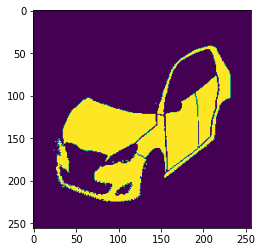

In [ ]:
plt.imshow(mistake_arr)
plt.show()

In [ ]:
net.eval()
input = DS_train.data[1].reshape([1,1,256,256])
input = get_variable(torch.tensor(input).type(torch.FloatTensor))
output = net(input)

img_label = one_hot2_2d(get_numpy(output)[0])
img_pred = one_hot2_2d(DS_train.labels[1])

plt.subplot(131)
plt.imshow(img_label[0])

plt.subplot(132)
plt.imshow(img_pred[0])


plt.subplot(133)
plt.imshow(DS_train.data[1,0]-np.min(DS_train.data[1]))
plt.show()
